### Chapter 06 복잡한 데이터 표현하기
#### 06-1 객체지향 API로 그래프 꾸미기
--- 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
ns_book7 = pd.read_csv('data/ns_book7.csv', low_memory = False)
print(ns_book7.shape)
ns_book7.head()

(376129, 13)


,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0.0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0.0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0.0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0.0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0.0,2021-03-19


In [3]:
## 발행부수 상위 30개 출판사만 추려서, 차트 만들기 
top30_pubs = ns_book7['출판사'].value_counts()[:30]
top30_pubs_idx = ns_book7['출판사'].isin(top30_pubs.index)
top30_pubs_idx.sum()

51826

In [4]:
## 상위 30개 출판사 데이터가 5만개 이상 --> sample() 사용하여 랜덤하게 1000개 추출 
ns_book8 = ns_book7[top30_pubs_idx].sample(1000, random_state = 42)
ns_book8.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
67375,74517,정치의 도덕적 기초,지은이: 이언 샤피로 ;옮긴이: 노승영,문학동네,2017,9788954643986,NaN,0,NaN,193,1,4.0,2017-04-26
211274,228372,교회 가기 싫다고?,제이크 콜슨 지음 ;마영례 옮김,살림출판사,2009,9788952211958,NaN,0,NaN,234.8,1,4.0,2009-07-21
311263,332434,한국의 대학도서관 무엇이 문제인가,김정근 지음,한울,1995,9788946022164,NaN,9,NaN,027.6,2,6.0,2005-05-30
340744,363290,"자본주의의 시, 광고 슬로건",김경석 지음,커뮤니케이션북스,2003,9788984991354,NaN,0,NaN,326.14,1,7.0,2004-11-06
360713,385056,콘텐츠 비즈니스란 무엇인가,노베나 유타카 지음,황금가지,2001,9788982733161,NaN,0,NaN,020.13,1,0.0,1970-01-01


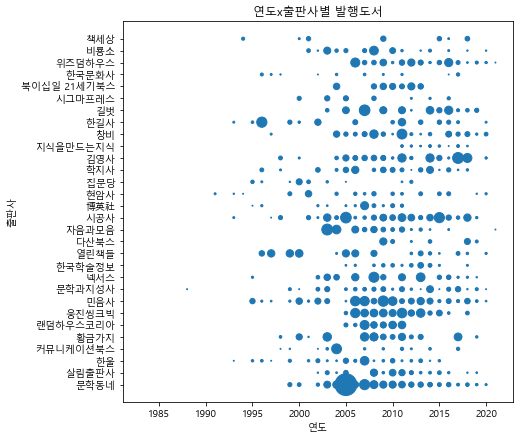

In [5]:
## s = : 값에 따라 마커의 크기 결정 
fig, ax = plt.subplots(figsize = (7,7))
ax.scatter(ns_book8['발행년도'], ns_book8['출판사'], s = ns_book8['대출건수'])
ax.set_title('연도x출판사별 발행도서')
ax.set_xlabel('연도')
ax.set_ylabel('출판사')
fig.show()

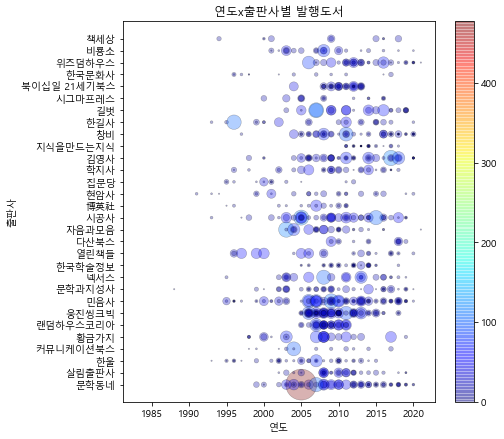

In [6]:
## linewidth = : 마커의 테두리선 두께 지정. 기본값은 1.5 
## edgecolors = : 마커 테두리선의 색깔 지정 
## s = : 마커의 크기 
## c = : 산정도의 색 지정 
## cmap = : color bar 추가 

fig, ax = plt.subplots(figsize = (7,7))
a = ax.scatter(ns_book8['발행년도'], ns_book8['출판사'], 
               linewidths = 0.5, edgecolors = 'k', alpha = 0.3, 
               s = ns_book8['대출건수']*2, c = ns_book8['대출건수'], cmap = 'jet')
ax.set_title('연도x출판사별 발행도서')
ax.set_xlabel('연도')
ax.set_ylabel('출판사')
fig.colorbar(a)
fig.show()

--- 
#### 06-2 맷플롯립의 고급 기능 배우기

In [7]:
## top30 출판사의 발행년도와 대출건수 데이터 
top30_pubs = ns_book7['출판사'].value_counts()[:30]
top30_pubs_idx = ns_book7['출판사'].isin(top30_pubs.index)
ns_book9 = ns_book7[top30_pubs_idx][['출판사', '발행년도', '대출건수']]
ns_book9

,출판사,발행년도,대출건수
0,민음사,2021,0.0
4,김영사,2021,0.0
23,문학동네,2021,0.0
24,한길사,2021,0.0
39,현암사,2021,0.0
...,...,...,...
376097,문학과지성사,1983,0.0
376098,문학과지성사,1983,0.0
376114,시공사,1995,0.0
376121,집문당,1990,0.0


In [8]:
ns_book9 = ns_book9.groupby(by=['출판사', '발행년도']).sum()
## index 초기화
ns_book9 = ns_book9.reset_index()
ns_book9

,출판사,발행년도,대출건수
0,博英社,1947,0.0
1,博英社,1975,0.0
2,博英社,1977,0.0
3,博英社,1986,1.0
4,博英社,1987,1.0
...,...,...,...
881,황금가지,2018,200.0
882,황금가지,2019,133.0
883,황금가지,2020,98.0
884,황금가지,2021,1.0


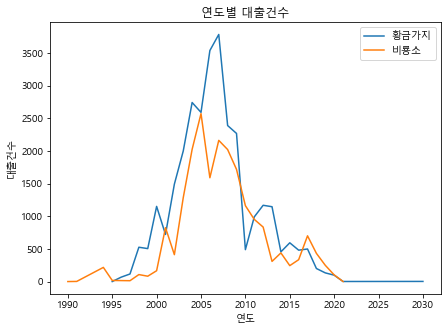

In [9]:
## 출판사가 황금가지, 비룡소 인 것의 연도별 대출건수 비교 : label과 legend 사용 
line_1 = ns_book9[ns_book9['출판사'] == '황금가지']
line_2 = ns_book9[ns_book9['출판사'] == '비룡소']

fig, ax = plt.subplots(figsize = (7,5))
ax.plot(line_1['발행년도'], line_1['대출건수'], label = '황금가지')
ax.plot(line_2['발행년도'], line_2['대출건수'], label = '비룡소')
ax.set_title('연도별 대출건수')
ax.set_xlabel('연도')
ax.set_ylabel('대출건수')
ax.legend()
fig.show()

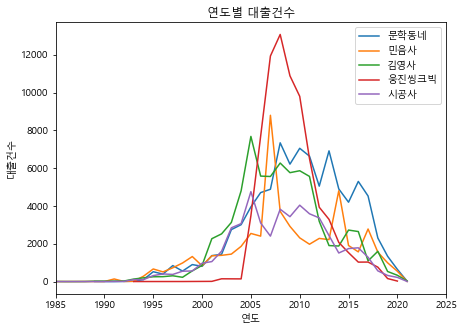

In [10]:
## for문 사용하여 top5 출판사 차트 만들기 
## set_xlim() : x축 범위 제한 
fig, ax = plt.subplots(figsize = (7,5))

for pub in top30_pubs.index[:5]: 
    line = ns_book9[ns_book9['출판사'] == pub]
    ax.plot(line['발행년도'], line['대출건수'], label = pub)

ax.set_title('연도별 대출건수')
ax.set_xlabel('연도')
ax.set_ylabel('대출건수')
ax.set_xlim(1985, 2025)
ax.legend()
fig.show()

--- 
#### - pivot_table()과 stackplot() 
---

In [11]:
ns_book10 = ns_book9.pivot_table(index = '출판사', columns = '발행년도')
ns_book10.head()

대출건수                                               ...                  \
발행년도 1947 1974 1975 1976 1977 1978 1979 1980 1981 1982  ...    2013    2014   
출판사                                                     ...                   
博英社   0.0  NaN  0.0  NaN  0.0  NaN  NaN  NaN  NaN  NaN  ...     NaN   118.0   
길벗    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  1162.0  1619.0   
김영사   NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  0.0  0.0  ...  1905.0  1881.0   
넥서스   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  1828.0  1429.0   
다산북스  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  1100.0  1361.0   

                                                               
발행년도    2015    2016    2017    2018   2019   2020  2021 2030  
출판사                                                            
博英社     57.0    47.0     2.0     8.0    NaN    1.0   NaN  NaN  
길벗    1410.0  1597.0  1626.0  1004.0  773.0  292.0  12.0  NaN  
김영사   2726.0  2647.0  1094.0  1602.0  533.0  332.0  30.0  NaN  
넥서스    765.0  1146.0   932.0   565.0   90.0   15.0   0.0  NaN  
다산북스  1321.0  1137.0  1249.0   773.0  526.0  127.0  13.0  NaN  

[5 rows x 50 columns]

In [12]:
## ## stackplot은 쌓는 기준을 명시해 줘야 함, 여기서는 발행년도를 기준으로 데이터를 stack해야 됨 
## get_level_values() : 컬럼에서 선택한 것만 가져온다. 
ns_book10.columns[:5]

MultiIndex([('대출건수', 1947),
            ('대출건수', 1974),
            ('대출건수', 1975),
            ('대출건수', 1976),
            ('대출건수', 1977)],
           names=[None, '발행년도'])

In [13]:
top10_pubs = top30_pubs.index[:10]
year_cols = ns_book10.columns.get_level_values(1)
year_cols

Int64Index([1947, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
            1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
            1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
            2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
            2017, 2018, 2019, 2020, 2021, 2030],
           dtype='int64', name='발행년도')

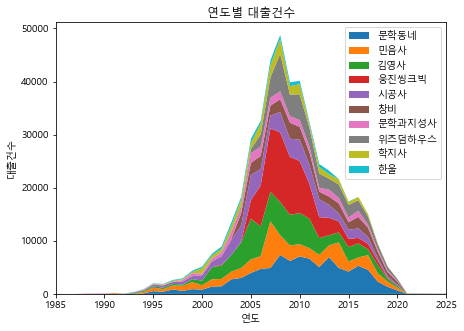

In [14]:
fig, ax = plt.subplots(figsize = (7,5))
## stackplot은 쌓는 기준을 명시해 줘야 함, 여기서는 year_cols 
ax.stackplot(year_cols, ns_book10.loc[top10_pubs].fillna(0), labels = top10_pubs)

ax.set_title('연도별 대출건수')
ax.set_xlabel('연도')
ax.set_ylabel('대출건수')
ax.set_xlim(1985, 2025)
ax.legend()
fig.show()

---
#### - stacked bar : cumsum()
---

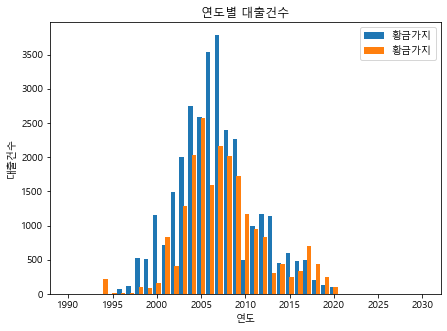

In [15]:
## +/-와 width= 를 사용하여, 막대간 구별이 용이하게 
fig, ax = plt.subplots(figsize = (7,5))

ax.bar(line_1['발행년도']-0.2, line_1['대출건수'], width=0.5, label = '황금가지')
ax.bar(line_2['발행년도']+0.2, line_2['대출건수'], width=0.5, label = '황금가지')

ax.set_title('연도별 대출건수')
ax.set_xlabel('연도')
ax.set_ylabel('대출건수')
ax.legend()
fig.show()

출판사   博英社  길벗  김영사  넥서스  다산북스  랜덤하우스코리아  문학과지성사  문학동네  민음사  북이십일 21세기북스  ...  \
발행년도                                                                     ...   
1947  0.0 NaN  NaN  NaN   NaN       NaN     NaN   NaN  NaN          NaN  ...   

출판사   창비  책세상  커뮤니케이션북스  학지사  한국문화사  한국학술정보  한길사  한울  현암사  황금가지  
발행년도                                                             
1947 NaN  NaN       NaN  NaN    NaN     NaN  NaN NaN  NaN   NaN  

[1 rows x 30 columns]


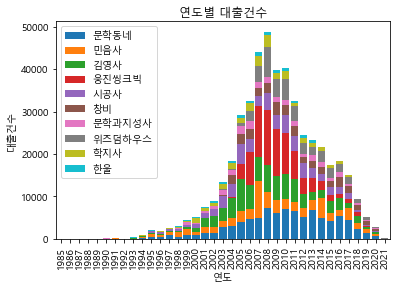

In [28]:
## 판다스의 stacked = True 
## index를 x축으로 하는 pivot_table이 필요 (*plt.xlim(1985, 2025)이 먹지 않아, 데이터상에서 제한해 줘야함)

ns_book11 = ns_book9.pivot_table(index='발행년도', columns='출판사', values= '대출건수')
print(ns_book11.head(1))

ns_book11.loc[1985:2025, top10_pubs].plot.bar(title='연도별 대출건수', stacked = True, width=0.8)
plt.xlabel('연도')
plt.ylabel('대출건수')
plt.legend()
plt.show()

--- 
#### - pie chart
---

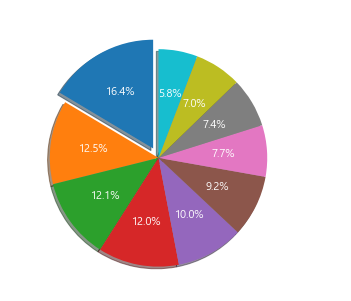

In [17]:
## top10 출판사에 대한 파이차트 
fig, ax = plt.subplots(figsize = (7,5))
ax.pie(top30_pubs[:10], labels = top30_pubs.index[:10], 
       startangle = 90,              ## 각이 12시로 부터 시작하도록 지정 
       autopct = '%.1f%%',           ## %.1f = 소수 첫째자리 까지의 실수형, %% = %를 표시 (ex. %d = 비율표시)
       explode = [0.1] + [0] *9,     ## 강조하려는 조각을 떨어뜨릴 반지름 비율, 첫번째는 0.1% & 나머지 9개는 0만큼 떨궈라  
       shadow = True,                ## 그림자 효과 활성화
       textprops = dict(size=11, color="white")   ## 폰트 크기, 색깔 설정 
      )

ax.set_title('출판사별 도서 비율', color = 'white')
fig.show()

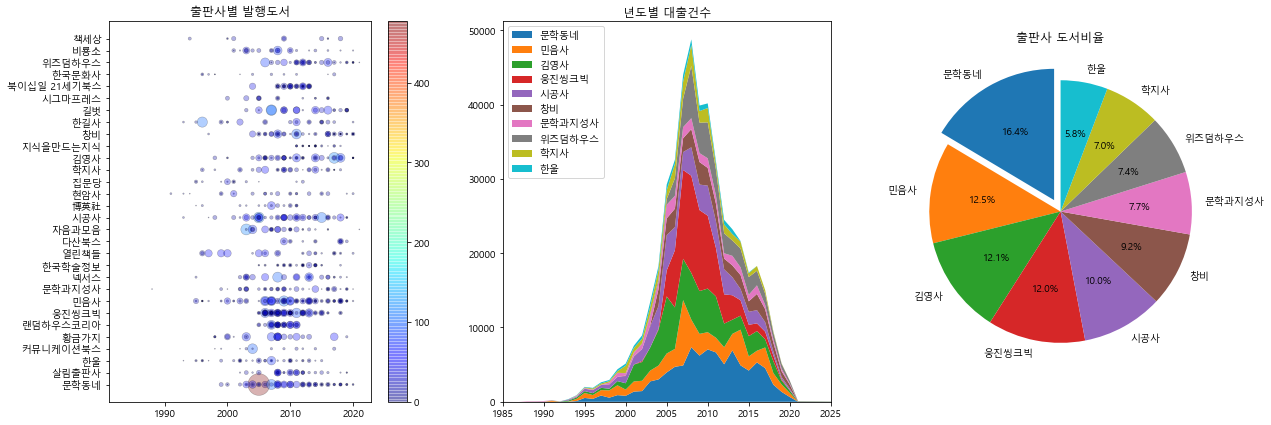

In [25]:
## total summary 
fig, axes = plt.subplots(1,3, figsize=(20, 7))

# 산점도
ns_book8 = ns_book7[top30_pubs_idx].sample(1000, random_state=42)
sc = axes[0].scatter(ns_book8['발행년도'], ns_book8['출판사'], 
                        linewidths=0.5, edgecolors='k', alpha=0.3,
                        s=ns_book8['대출건수'], c=ns_book8['대출건수'], cmap='jet')
axes[0].set_title('출판사별 발행도서')
fig.colorbar(sc, ax=axes[0])

# 스택 선 그래프
axes[1].stackplot(year_cols, ns_book10.loc[top10_pubs].fillna(0), labels=top10_pubs)
axes[1].set_title('년도별 대출건수')
axes[1].legend(loc='upper left')
axes[1].set_xlim(1985, 2025)

# 원 그래프
axes[2].pie(top30_pubs[:10], labels=top30_pubs.index[:10], startangle=90, autopct='%.1f%%', explode=[0.1]+[0]*9)
axes[2].set_title('출판사 도서비율')

fig.savefig('all_in_one.png')
fig.show()